In [1]:
import os, sys
from os.path import expanduser, join
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import dipy
from dipy.data import get_fnames
from dipy.io.image import save_nifti
from dipy.io.image import load_nifti

## Load preoperative and postoperative freewater maps

In [76]:
home = expanduser('~')

subj_list = ['Patient012' 
            ]
for subj in subj_list:
    t1scan_dname = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'dwi_postproc')
    t2scan_dname = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'ANTS_coreg')
    savedir = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'voxcalc')
    t1fwmap = join(t1scan_dname, 'fwmap_t1_nocsf.nii.gz')
    t2fwmap = join(t2scan_dname, 'fwmap_t2tot1_nocsf.nii.gz')
 

    print(savedir)
    print(t1fwmap)
    print(t2fwmap)
 

/Users/yizhouwan/PhD/pram/analysis/preop/Patient012/voxcalc
/Users/yizhouwan/PhD/pram/analysis/preop/Patient012/dwi_postproc/fwmap_t1_nocsf.nii.gz
/Users/yizhouwan/PhD/pram/analysis/preop/Patient012/ANTS_coreg/fwmap_t2tot1_nocsf.nii.gz


In [77]:
t1data, affine = load_nifti(t1fwmap)
t2data, affine = load_nifti(t2fwmap)

print("The shape of preop fwmap is {}".format(t1data.shape))
print("The shape of postop fwmap is {}".format(t2data.shape))

The shape of preop fwmap is (160, 160, 110)
The shape of postop fwmap is (160, 160, 110)


In [78]:
t1data

array([[[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]],

       [[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]],

       [[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]],

       ...,

       [[0.01, 0.01, 0.0

## Print example slices from preop and postop scans

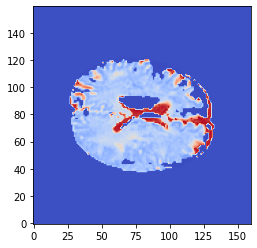

In [79]:
mid_sli = 70
t1slice = plt.imshow(t1data[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

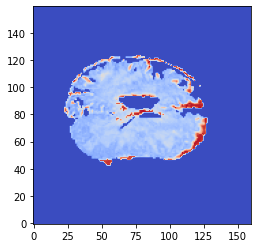

In [80]:
t2slice = plt.imshow(t2data[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

## Reshape scans from 3D array to 1D array and construct pandas dataframe with variables

In [81]:
t1data_1D = t1data.ravel()
t2data_1D = t2data.ravel()

P003 = pd.DataFrame(data = t1data_1D, columns = ['preop_vox'])
P003['postop_vox'] = t2data_1D
P003['DOB'] = '24/7/1972'
P003['DOB'] = pd.to_datetime(P003['DOB'], format = '%d/%m/%Y')
P003['DOS'] = '12/5/2017'
P003['DOS'] = pd.to_datetime(P003['DOS'], format = '%d/%m/%Y')
P003['age'] = P003['DOS'] - P003['DOB'] 
P003['age'] = P003['age'] / np.timedelta64(1, 'Y')
P003['sex'] = 0 # Male = 0, female = 1
P003['ICV'] = 1570.5 # Intracranial volume calculated from SPM12 segment in cm3

In [82]:
P003

,preop_vox,postop_vox,DOB,DOS,age,sex,ICV
0,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
1,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
2,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
3,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
4,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
...,...,...,...,...,...,...,...
2815995,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
2815996,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
2815997,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5
2815998,0.01,0.0,1972-07-24,2017-05-12,44.800372,0,1570.5


## Exploratory plots of the data

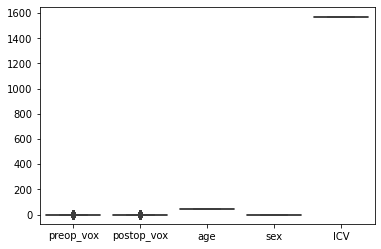

In [83]:
preop_boxplot = sns.boxplot(data = P003) 

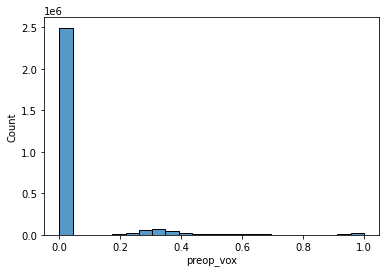

In [84]:
t1vox_plot = sns.histplot(data = P003['preop_vox'])

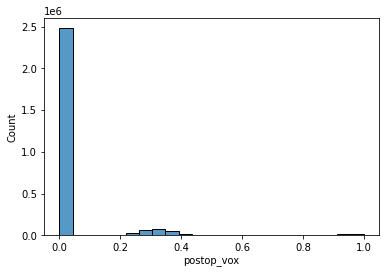

In [85]:
t2vox_plot = sns.histplot(data = P003['postop_vox'])

## Scale the continuous variables

In [86]:
cont_vars = ['preop_vox',
             'postop_vox'
             'age',
             'ICV'
            ]
P003_clean = P003.drop(columns = ['DOB', 'DOS'], axis = 1)

P003_clean

,preop_vox,postop_vox,age,sex,ICV
0,0.01,0.0,44.800372,0,1570.5
1,0.01,0.0,44.800372,0,1570.5
2,0.01,0.0,44.800372,0,1570.5
3,0.01,0.0,44.800372,0,1570.5
4,0.01,0.0,44.800372,0,1570.5
...,...,...,...,...,...
2815995,0.01,0.0,44.800372,0,1570.5
2815996,0.01,0.0,44.800372,0,1570.5
2815997,0.01,0.0,44.800372,0,1570.5
2815998,0.01,0.0,44.800372,0,1570.5


In [87]:
P003_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816000 entries, 0 to 2815999
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   preop_vox   float32
 1   postop_vox  float32
 2   age         float64
 3   sex         int64  
 4   ICV         float64
dtypes: float32(2), float64(2), int64(1)
memory usage: 85.9 MB


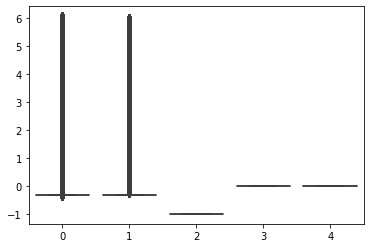

In [88]:
from sklearn.preprocessing import StandardScaler

stander = StandardScaler()
P003_s = stander.fit_transform(P003_clean)

graph_s = sns.boxplot(data = P003_s)

In [89]:
P003_s = pd.DataFrame(P003_s)
P003_s.columns = ['preop_vox', 'postop_vox', 'age', 'sex', 'ICV']
P003_s

,preop_vox,postop_vox,age,sex,ICV
0,-0.309578,-0.3198,-1.0,0.0,0.0
1,-0.309578,-0.3198,-1.0,0.0,0.0
2,-0.309578,-0.3198,-1.0,0.0,0.0
3,-0.309578,-0.3198,-1.0,0.0,0.0
4,-0.309578,-0.3198,-1.0,0.0,0.0
...,...,...,...,...,...
2815995,-0.309578,-0.3198,-1.0,0.0,0.0
2815996,-0.309578,-0.3198,-1.0,0.0,0.0
2815997,-0.309578,-0.3198,-1.0,0.0,0.0
2815998,-0.309578,-0.3198,-1.0,0.0,0.0


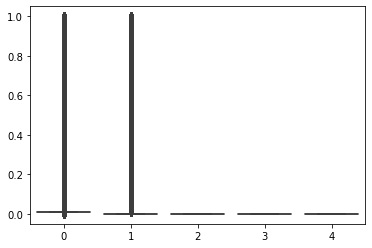

In [90]:
from sklearn.preprocessing import  MinMaxScaler

normer = MinMaxScaler()

# Your code below

P003_n = normer.fit_transform(P003_clean)

graph_n = sns.boxplot(data = P003_n)

In [91]:
P003_n = pd.DataFrame(P003_n)
P003_n.columns = ['preop_vox', 'postop_vox', 'age', 'sex', 'ICV']
P003_n

,preop_vox,postop_vox,age,sex,ICV
0,0.01,0.0,0.0,0.0,0.0
1,0.01,0.0,0.0,0.0,0.0
2,0.01,0.0,0.0,0.0,0.0
3,0.01,0.0,0.0,0.0,0.0
4,0.01,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2815995,0.01,0.0,0.0,0.0,0.0
2815996,0.01,0.0,0.0,0.0,0.0
2815997,0.01,0.0,0.0,0.0,0.0
2815998,0.01,0.0,0.0,0.0,0.0


## Checking linearality 

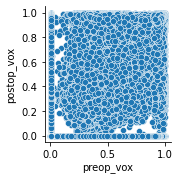

In [92]:
sns.pairplot(data = P003_clean,
             x_vars = ['preop_vox'],
             y_vars = ['postop_vox']);

## Checking correlation

<AxesSubplot:>

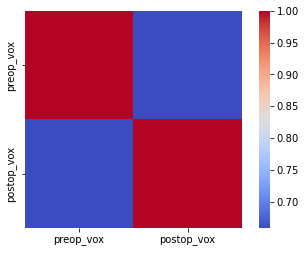

In [93]:
cmatrix = P003_clean[['preop_vox', 'postop_vox']].corr()

sns.heatmap(cmatrix, cmap='coolwarm', square=True, )

## Fit linear regression model for single variables

In [94]:
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro

In [95]:
age_reshaped = P003_clean['age'].values.reshape(-1, 1)
#P003_clean['age_reshaped'] = age_reshaped

In [96]:
P003_clean

,preop_vox,postop_vox,age,sex,ICV
0,0.01,0.0,44.800372,0,1570.5
1,0.01,0.0,44.800372,0,1570.5
2,0.01,0.0,44.800372,0,1570.5
3,0.01,0.0,44.800372,0,1570.5
4,0.01,0.0,44.800372,0,1570.5
...,...,...,...,...,...
2815995,0.01,0.0,44.800372,0,1570.5
2815996,0.01,0.0,44.800372,0,1570.5
2815997,0.01,0.0,44.800372,0,1570.5
2815998,0.01,0.0,44.800372,0,1570.5


In [97]:
for i in range(10):
    y_vox = P003_clean["postop_vox"][i]
    x_vars = P003_clean.loc[i, :]
    x_df = pd.DataFrame(x_vars).transpose()
    print(x_df)

   preop_vox  postop_vox        age  sex     ICV
0       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
1       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
2       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
3       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
4       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
5       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
6       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
7       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
8       0.01         0.0  44.800372  0.0  1570.5
   preop_vox  postop_vox        age  sex     ICV
9       0.01         0.0  44.800372  0.0  1570.5


In [60]:
y_vox = P003_clean["postop_vox"][1]
y_array = np.array(y_vox).reshape(-1, 1)
y_series = pd.Series(y_vox)
y_series.shape

(1,)

In [51]:
x_vars = P003_clean.loc[0, ['preop_vox', 'age', 'sex', 'ICV']]
x_df = pd.DataFrame(x_vars).transpose()
x_df.shape

(1, 4)

In [61]:
residuals_pervox_array = np.array([])
for i in P003_clean.index:
    y_vox = P003_clean["postop_vox"][i]
    #y_array = np.array(y_vox).reshape(-1, 1)
    y_series = pd.Series(y_vox)
    x_vars = P003_clean.loc[i, ['preop_vox', 'age', 'sex', 'ICV']]
    x_df = pd.DataFrame(x_vars).transpose()
    model_pervox = LinearRegression()
    model_pervox.fit(x_df, y_array)
    y_pervox_pred = model_pervox.predict(x_df)
    residuals_pervox = y_pervox_pred - y_array
    residuals_pervox_array = np.append(residuals_pervox_array, residuals_pervox)


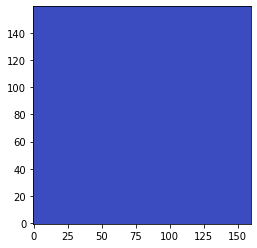

In [62]:
residuals_pervox_array_reshaped = residuals_pervox_array.reshape(160, 160, 112)
residuals_pervox_array_reshaped_slice = plt.imshow(residuals_pervox_array_reshaped[:, :, 10], cmap ='coolwarm', origin ='lower')

array([[0., 0., 0., 0., 0., 0.]])

In [186]:
model_pervox.coef_

array([[0., 0., 0., 0., 0., 0.]])

In [146]:
x_vars

preop_vox          0.010000
postop_vox         0.000000
age               44.800372
sex                0.000000
ICV             1570.500000
age_reshaped      44.800372
Name: 0, dtype: float64

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


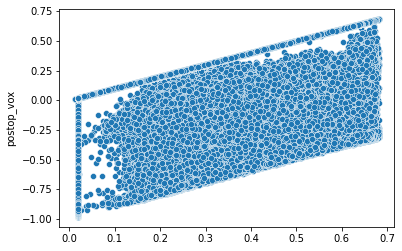

R2 for feature preop_vox = 0.43259
Weight for single feature (feature): [0.67011034]
p-value for S-W test >= 0.05? False


In [98]:
for feature in ['preop_vox']:
    x = P003_clean[feature]
    x = x.values.reshape(-1, 1)
    y = P003_clean['postop_vox']
    model = LinearRegression()
    model.fit(x, y)

    score = model.score(x, y)
    
    y_pred = model.predict(x)
    residuals = y_pred - y
    
    test = shapiro(residuals)
    
    g = sns.scatterplot(y=residuals, x=y_pred);
    plt.show()
    
    print(f"R2 for feature {feature} = {score:.5f}")
    print(f"Weight for single feature (feature): {model.coef_}")
    print(f"p-value for S-W test >= 0.05? {test.pvalue >= 0.05}")

In [100]:
model.coef_


array([0.67011034], dtype=float32)

In [170]:
x = P003['age']
y = P003['postop_vox']

In [ ]:
x_reshape = x.values.reshape(-1, 1)

In [176]:
x_orig.shape

(2867200, 4)

In [56]:
type(y_orig)

pandas.core.series.Series

## Fit multivariate linear regression for unscaled variables

In [53]:
x_orig = P003_clean[['age', 'sex', 'ICV', 'preop_vox']]
y_orig = P003_clean['postop_vox']
model_orig = LinearRegression()
model_orig.fit(x_orig, y_orig)
y_orig_pred = model_orig.predict(x_orig)
resid_orig = y_orig_pred - y_orig

In [23]:
y_orig_pred

array([0.01456364, 0.01456364, 0.01456364, ..., 0.01456364, 0.01456364,
       0.01456364])

In [24]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2867195    0.0
2867196    0.0
2867197    0.0
2867198    0.0
2867199    0.0
Name: postop_vox, Length: 2867200, dtype: float32

In [188]:
resid_orig.shape

(2867200,)

In [26]:
model_orig.score(x_orig, y_orig)

0.4264028528474322

In [27]:
cdf = pd.DataFrame(model_orig.coef_, x_orig.columns, columns=['Coefficients'])
print(cdf)
print(model_orig.intercept_)

           Coefficients
age            0.000824
sex            0.000000
ICV            0.000000
preop_vox      0.599638
-0.02833448022883623


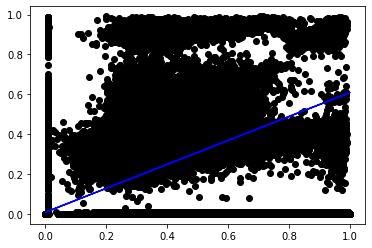

In [28]:
plt.scatter(x_orig['preop_vox'], y_orig,color='black')
age_beta = cdf.loc['age'][0]
preop_vox_beta = cdf.loc['preop_vox'][0]
predicted_y = preop_vox_beta * x_orig['preop_vox'] + (age_beta * x_orig['age'] + model_orig.intercept_) 
plt.plot(x_orig['preop_vox'], predicted_y, 'b')

In [29]:
predicted_y = predicted_y.to_numpy()
y_orig_pred_reshaped = y_orig_pred.reshape(160, 160, 112)
y_orig_pred_reshaped.shape

(160, 160, 112)

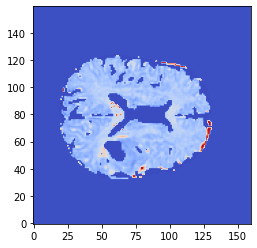

In [30]:
y_orig_pred_reshaped_slice = plt.imshow(y_orig_pred_reshaped[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

In [31]:
predicted_y_reshaped = predicted_y.reshape(160, 160, 112)
predicted_y_reshaped.shape

(160, 160, 112)

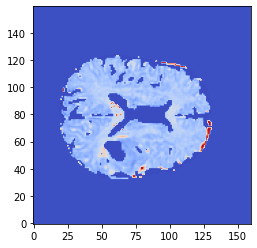

In [32]:
predicted_y_reshaped_slice = plt.imshow(predicted_y_reshaped[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

In [33]:
resid_orig = resid_orig.to_numpy()
resid_orig_reshaped = resid_orig.reshape(160, 160, 112)
resid_orig_reshaped.shape

(160, 160, 112)

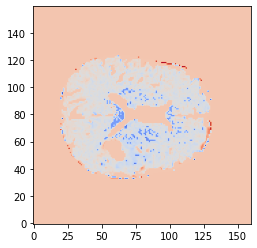

In [34]:
resid_orig_slice = plt.imshow(resid_orig_reshaped[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

## Fit multivariate linear regression for scaled variables

In [35]:
x_s = P003_s[['age', 'sex', 'ICV', 'preop_vox']]
y_s = P003_s['postop_vox']
model_s = LinearRegression()
model_s.fit(x_s, y_s)
y_s_pred = model_s.predict(x_s)
resid_s = y_s_pred - y_s

In [78]:
x_s

,age,sex,ICV,preop_vox
0,-1.0,0.0,0.0,-0.338908
1,-1.0,0.0,0.0,-0.338908
2,-1.0,0.0,0.0,-0.338908
3,-1.0,0.0,0.0,-0.338908
4,-1.0,0.0,0.0,-0.338908
...,...,...,...,...
2867195,-1.0,0.0,0.0,-0.338908
2867196,-1.0,0.0,0.0,-0.338908
2867197,-1.0,0.0,0.0,-0.338908
2867198,-1.0,0.0,0.0,-0.338908


In [143]:
y_s

0         -0.332475
1         -0.332475
2         -0.332475
3         -0.332475
4         -0.332475
             ...   
2867195   -0.332475
2867196   -0.332475
2867197   -0.332475
2867198   -0.332475
2867199   -0.332475
Name: postop_vox, Length: 2867200, dtype: float64

In [37]:
resid_s

0          0.11117
1          0.11117
2          0.11117
3          0.11117
4          0.11117
            ...   
2867195    0.11117
2867196    0.11117
2867197    0.11117
2867198    0.11117
2867199    0.11117
Name: postop_vox, Length: 2867200, dtype: float64

In [38]:
cdf_s = pd.DataFrame(model_s.coef_, x_s.columns, columns=['Coefficients'])
print(cdf_s)
print(model_s.intercept_)

           Coefficients
age            0.000000
sex            0.000000
ICV            0.000000
preop_vox      0.652995
-7.783238891400595e-17


Text(0, 0.5, 'y_s')

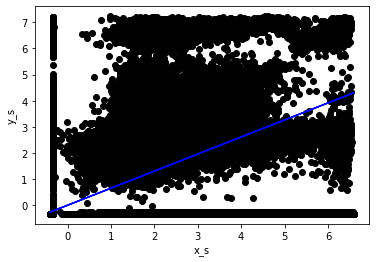

In [39]:
plt.scatter(x_s['preop_vox'], y_s,color='black')
plt.plot(x_s['preop_vox'], y_s_pred, 'b')
plt.xlabel('x_s')
plt.ylabel('y_s')

In [40]:
y_s_pred_reshaped = y_orig_pred.reshape(160, 160, 112)
y_s_pred_reshaped.shape

(160, 160, 112)

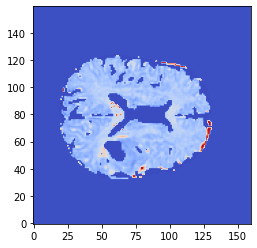

In [41]:
y_s_pred_reshaped_slice = plt.imshow(t1data[:, :, mid_sli], cmap ='coolwarm', origin ='lower')

## Multiple subject analysis

In [149]:
home = expanduser('~')

subj_list = ['Patient003',
             'Patient012',
             'Patient014',
             'Patient015',
             'Patient019',
             'Patient024',
             'Patient026',
             'Patient030',
             'Patient038',
             'Patient040',
             'Patient041'
            ]

score_list = []
y_pred_list = []
residuals_list = []
coef_list = []
intercept_list = []

for subj in subj_list:
    # load scans
    t1scan_dname = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'dwi_postproc')
    t2scan_dname = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'ANTS_coreg')
    savedir = join(home, 'PhD', 'pram', 'analysis', 'preop', subj, 'voxcalc')
    t1fwmap = join(t1scan_dname, 'fwmap_t1_nocsf.nii.gz')
    t2fwmap = join(t2scan_dname, 'fwmap_t2tot1_nocsf.nii.gz')
    
    #convert 3D array into 2D array
    t1data_1D = t1data.ravel()
    t2data_1D = t2data.ravel()
    
    #construct df to hold preop and postop voxels
    ptdf = pd.DataFrame(data = t1data_1D, columns = ['preop_vox'])
    ptdf['postop_vox'] = t2data_1D
    
    #perform linear regression for each patient
    x = ptdf['preop_vox']
    x = x.values.reshape(-1, 1)
    y = ptdf['postop_vox']
    model = LinearRegression()
    model.fit(x, y)
    
    #save model parameters
    score = model.score(x, y)
    y_pred = model.predict(x)
    residuals = y_pred - y
    coef = model.coef_
    intercept = model.intercept_

    score_list.append(score)
    y_pred_list.append(y_pred)
    residuals_list.append(residuals)
    coef_list.append(coef)
    intercept_list.append(intercept)

In [144]:
score_list

[0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322,
 0.4325853406500322]

In [145]:
y_pred_list

[array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.0184175,
        0.0184175], dtype=float32),
 array([0.0184175, 0.0184175, 0.0184175, ..., 0.0184175, 0.01841

In [146]:
residuals_list

[0          0.018417
 1          0.018417
 2          0.018417
 3          0.018417
 4          0.018417
              ...   
 2815995    0.018417
 2815996    0.018417
 2815997    0.018417
 2815998    0.018417
 2815999    0.018417
 Name: postop_vox, Length: 2816000, dtype: float32,
 0          0.018417
 1          0.018417
 2          0.018417
 3          0.018417
 4          0.018417
              ...   
 2815995    0.018417
 2815996    0.018417
 2815997    0.018417
 2815998    0.018417
 2815999    0.018417
 Name: postop_vox, Length: 2816000, dtype: float32,
 0          0.018417
 1          0.018417
 2          0.018417
 3          0.018417
 4          0.018417
              ...   
 2815995    0.018417
 2815996    0.018417
 2815997    0.018417
 2815998    0.018417
 2815999    0.018417
 Name: postop_vox, Length: 2816000, dtype: float32,
 0          0.018417
 1          0.018417
 2          0.018417
 3          0.018417
 4          0.018417
              ...   
 2815995    0.018417
 281

In [147]:
coef_list

[array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32),
 array([0.67011034], dtype=float32)]

In [150]:
intercept_list

[0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396,
 0.011716396]